In [114]:
import requests
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.visualization import simple_norm
from spectral_cube import SpectralCube

# Open Table

In [28]:
fn = 'apjs432318t1_ascii.txt'

In [61]:
url = 'apjs432318t1_ascii.txt'
tbl = ascii.read(url, format='csv', delimiter='\t', data_start=4, header_start=2)

In [78]:
tbl[:3]

Number,l,b,V_LSR,Deltal,Deltab,DeltaV,Comments
str38,float64,float64,int64,float64,float64,int64,str41
1,-1.4,-0.11,-139,0.04,0.03,28,"HVCC, CO -1.41-0.08"
2,-1.29,-0.19,-73,0.01,0.03,14,Velocity end
3,-1.29,-0.13,-77,0.01,0.05,28,Velocity end?


In [107]:
arr = [True if 'HVCC' in c else False for c in tbl['Comments']]
tbl_masked = tbl[arr]

In [108]:
coords = SkyCoord(tbl_masked['l'], tbl_masked['b'], frame='galactic', unit='deg')
v_lsr = tbl_masked['V_LSR']*u.km/u.s
delta_l = tbl_masked['Deltal']*u.deg
delta_b = tbl_masked['Deltab']*u.deg
delta_v = tbl_masked['DeltaV']*u.km/u.s

# Open ACES Data

In [72]:
whole_pv_CS = fits.open('/orange/adamginsburg/ACES/mosaics/cubes/moments/CS21_CubeMosaic_PV_max.fits')
max_CS = fits.open('/orange/adamginsburg/ACES/mosaics/cubes/moments/CS21_CubeMosaic_max.fits')

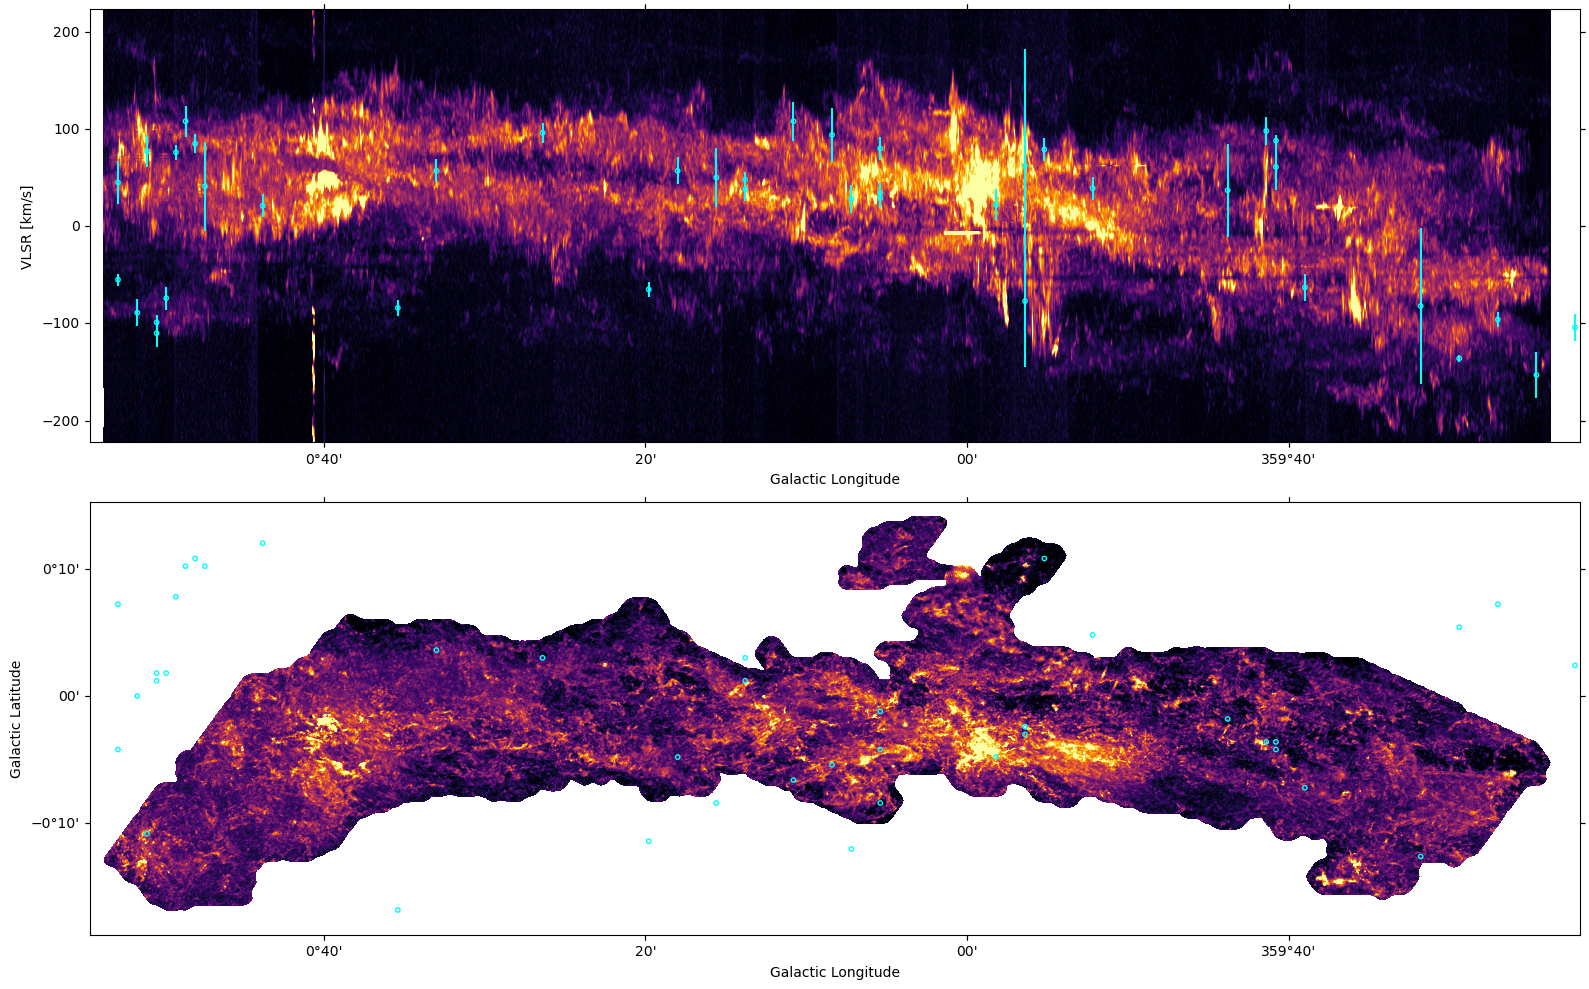

In [124]:
fig = plt.figure(figsize=(16, 10))

### Position-Velocity
ax1 = plt.subplot(211, projection=WCS(whole_pv_CS[0].header))
norm = simple_norm(whole_pv_CS[0].data, stretch='linear', min_percent=1, max_percent=99)
ax1.imshow(whole_pv_CS[0].data, cmap='inferno', aspect='auto', norm=norm)

xlim = ax1.get_xlim()
ylim = ax1.get_ylim()

ax1.scatter(coords.l, v_lsr.to(u.m/u.s), transform=ax1.get_transform('world'), edgecolor='cyan', facecolor='none', s=10, marker='o')
ax1.scatter(coords.l-360*u.deg, v_lsr.to(u.m/u.s), transform=ax1.get_transform('world'), edgecolor='cyan', facecolor='none', s=10, marker='o')
ax1.errorbar(coords.l, v_lsr.to(u.m/u.s), yerr=delta_v.to(u.m/u.s), fmt='none', color='cyan', transform=ax1.get_transform('world'))
ax1.errorbar(coords.l-360*u.deg, v_lsr.to(u.m/u.s), yerr=delta_v.to(u.m/u.s), fmt='none', color='cyan', transform=ax1.get_transform('world'))

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

ax11 = ax1.coords[1]
ax11.set_format_unit(u.km/u.s)
ax11.set_axislabel('VLSR [km/s]')
ax1.set_xlabel('Galactic Longitude')


### Spatial
ax2 = plt.subplot(212, projection=WCS(max_CS[0].header))
norm = simple_norm(max_CS[0].data, stretch='linear', min_percent=1, max_percent=99)
ax2.imshow(max_CS[0].data, cmap='inferno', aspect='auto', norm=norm)

xlim = ax2.get_xlim()
ylim = ax2.get_ylim()

ax2.scatter(coords.l, coords.b, transform=ax2.get_transform('world'), edgecolor='cyan', facecolor='none', s=10, marker='o')
#ax2.errorbar(coords.l, coords.b, xerr=delta_l, yerr=delta_b, fmt='none', color='cyan', transform=ax2.get_transform('world'))

ax2.set_xlim(xlim)
ax2.set_ylim(ylim)

ax2.set_xlabel('Galactic Longitude')
ax2.set_ylabel('Galactic Latitude')

plt.tight_layout()